# 1. Introduction

### 1.b Topic Background and Why should We Care

Education has long been a vital step for human growth and development of a society. It helps people understand their full potential and enhance their capabilities of promoting creativity and productivity in the world. Education at school is very important in a way that it develops students’ mindsets and prepares them for complex real-world problems in the future. Only when more students can succeed at school, can we have more opportunities to have changemakers succeed in enabling a better living for our society, to constantly adapt and innovate. Thus, it is necessary to pay attention to students’ academic scores at school and explore what factors contribute to students’ performance so that educators can understand how to foster students’ academic success. Parental education has been found to highly correlate with students’ success in school. According to Education Next, “educated parents enhance their children’s development and human capital by drawing on their own advanced language skills in communicating with their children,” which means that the children of highly educated parents can have an advantage in complex speech before they even start school; besides, “highly educated parents can also use their social capital to promote their children’s development”, so that children will look up to well-educated individuals they socialize with and expect they too will attain high levels of academic success (Egalite, 2016). Therefore, we will consider parental education as the main factor affecting students' academic performance in this research.


### 1.a Research Question Being Answered
We will focus on high school students from the United States and mainly discuss the casual relationship between parental education and students’ academic scores. Our research question is “what is the effect of parental level of education on students’ academic scores?” We propose that parental level of education have a positive and significant impact on students' academic scores.


### 1.c Literature Review

Farooq et al. (2011) in their study examine different factors influencing the academic performance of secondary school students in a metropolitan city of Pakistan. By applying descriptive and inferential statistical measures, the research uses standard t-test and ANOVA to investigate the effect of different factors on students’ achievement. The results reveal that socioeconomic status (SES) and parents’ education have a significant effect on students’ overall academic achievement as well as achievement in the subjects of Mathematics and English. The high and average socio-economic level affects the performance more than the lower level. Parents’ education affects children’s academic performance at school more than their occupation. The results also indicate that girls perform better than the male students. 

Hijazi and Naqvi (2006) in their study use a simple linear regression model to analyze the relationship between college students’ performance and selected potential influencing variables, i.e., student’s attitude towards attendance in class, hours spent in study on daily bases after college, students’ family income, students’ mother’s age and mother’s education. The study indicates that all selected variables have a significant and positive relationship with students’ performance except for family income and hours spent in study; these two variables are found to be significantly and negatively related to students’ performance. 

Jaggia and Kelly-Hawke (1999) in their study measure student performance by using the 1992 Massachusetts Educational Assessment Program (MEAP) test scores from 4th. 8th. and 12th grade students. With linear regression analysis, the study shows that family background and the stability of a community are the main factors affecting student performance. The data suggest that higher levels of spending have no consistent or systematic relation with student performance. 














# 2. Data

### 2.a describe the source of data

Our sample data set contains data about 1000 American high school students, regarding their gender, race, parental level of education, lunch situation, test preperation course completion status, and their test scores on three subjuects. 

Source: we found this dataset on Kaggle, the title of this dataset is Students' Performance in Exams. https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
    
  
  
  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'D:\USC\Econ 570\final project\StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75






### 2.b Data modification

We dropped data about students' gender and race. We do not consider the effect of these two factors in our model as we think this would result in discrimination issues. The main datasets about factors we want to include in our research are parental level of education, lunch, and test preparation course.

We add students' scores in three subjects, math, reading, and writing, together to get a total score as our dependent variable, indicating students’ academic performance.

We only use one datasets in this research. To better analyze, we ranked the parental level of education from 0 to 5, corresponding to some high school, high school, some college, associate, Bachelor, and master; for the lunch factor, we assigned value 0 to free/reduced and 1 to standard; for test preparation course factor, we assigned value 0 to none and 1 to completed. 

In [3]:
data.drop('gender', inplace = True,axis = 1)
data.drop('race/ethnicity', inplace = True, axis = 1)

data.rename(columns={"parental level of education":"parent_edu"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)

data["parent_edu"].replace(["some high school", "high school","some college", "bachelor's degree", "associate's degree", "master's degree"], 
                           ['some_high','high','some_college','bachelor','associate','master'], inplace=True)

data['total'] = data['math'] + data['reading'] + data['writing']

data.head()

,parent_edu,lunch,pre,math,reading,writing,total
0,bachelor,standard,none,72,72,74,218
1,some_college,standard,completed,69,90,88,247
2,master,standard,none,90,95,93,278
3,associate,free/reduced,none,47,57,44,148
4,some_college,standard,none,76,78,75,229





### 2.c Summary Statistics


### Parental Education Status

([<matplotlib.patches.Wedge at 0x24fc236a1c0>,
 [Text(0.8341981156790161, 0.717017087521336, 'some_high'),
  Text(-0.5717990621018805, 0.939705183863221, 'high'),
  Text(-1.0543739750814827, -0.3135211646298753, 'some_college'),
  Text(-0.11383566476996158, -1.0940938905900084, 'bachelor'),
  Text(0.8112644257554884, -0.7428660925790178, 'associate'),
  Text(1.0811581857178525, -0.20272389463327067, 'master')])

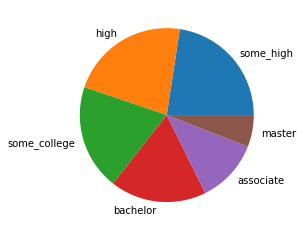

In [4]:
plt.pie(data['parent_edu'].value_counts() , labels = ['some_high','high','some_college','bachelor','associate','master'] )

### Scores

In [5]:

data.describe ()

,math,reading,writing,total
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [6]:
import statsmodels.formula.api as smf
from IPython.core.display import HTML


In [7]:

data["parent_edu"].replace(["some_high", "high","some_college", 
                            "bachelor", "associate", "master"], [0,1,2,4,3,5], inplace=True)

data["lunch"].replace(["standard", "free/reduced"], [1,0], inplace=True)

data["pre"].replace(["none", "completed"], [0,1], inplace=True)

data.head()


,parent_edu,lunch,pre,math,reading,writing,total
0,4,1,0,72,72,74,218
1,2,1,1,69,90,88,247
2,5,1,0,90,95,93,278
3,3,0,0,47,57,44,148
4,2,1,0,76,78,75,229


data["parent_edu"].replace(["some high school", "high school","some college", "bachelor's degree", "associate's degree",
                            "master's degree"], [0,1,2,4,3,5], inplace=True)








# 3. Models


### 3.1 First Model: without covariates


In the first model, we directly run a OLS regression with total score as dependent variable, and parent_education as independent variable


In [8]:
est1 = smf.ols(formula="total ~ parent_edu ", data=data).fit()
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     44.13
Date:                Wed, 04 May 2022   Prob (F-statistic):           5.04e-11
Time:                        03:04:51   Log-Likelihood:                -5152.7
No. Observations:                1000   AIC:                         1.031e+04
Df Residuals:                     998   BIC:                         1.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    190.7693      2.306     82.720      0.0

### 3.2 Second Model:

In the second model, we added two covariates into the model. We included variables indicating whether students had lunch, and whether students completed test preperation course before the test 

In [9]:
est2 = smf.ols(formula="total ~ parent_edu + lunch + pre ", data=data).fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     82.31
Date:                Wed, 04 May 2022   Prob (F-statistic):           1.42e-47
Time:                        03:04:51   Log-Likelihood:                -5063.6
No. Observations:                1000   AIC:                         1.014e+04
Df Residuals:                     996   BIC:                         1.015e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    164.5617      2.857     57.601      0.0

### 3.3 Third Model: 

In the third model, we created dummy variables on parental level of education. 

In [11]:


data["parent_edu"].replace([0,1,2,4,3,5], ["some_high", "high","some_college", 
                            "bachelor", "associate", "master"], inplace=True)



parent_dummy = pd.get_dummies(data['parent_edu'])


data = pd.concat([data,parent_dummy], axis=1)


est3 = smf.ols(formula="total ~ some_high + high  + some_college + bachelor + associate + master + lunch + pre ", data=data).fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     36.31
Date:                Wed, 04 May 2022   Prob (F-statistic):           2.36e-45
Time:                        03:06:23   Log-Likelihood:                -5060.3
No. Observations:                1000   AIC:                         1.014e+04
Df Residuals:                     992   BIC:                         1.018e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      154.7823      1.978     78.236   



# 4. Findings 

### 4.a 0. Summary

Most students’ parental level of education are high school and some high school; students with Master parental level of education only take part in a small percentage. However, there are still around 50% of students having at least some college parental level of education (lower than Master level).


### 4.a 1. First Model: without covariates

In the results of the without covariates model, the F test statistic value shows that 44.13 is the joint significance of the model. Adjusted R squared is 0.041. The low adjusted R squared value explains that parental level of education can only explain 4.1% of academic performance of students, and there should be other variables together to explain the rest 95.9%.
The coefficient of 6.0273 for parental level of education indicates that one level increase in parental level of education corresponds to 6.0273 increase in students' academic scores, along with the P-value, the result shows that the parental level of education is significantly and positively impacting students’ academic scores at 5 percent significance level.


### 4.a 2. Second Model: add two covariates 

F test value is 82.31. The adjusted R squared is 0.196, and the value is higher than the first model, which means adding two more independent variables as covariates makes it a better fit value to the OLS model. This also indicates that these two covariates besides parental level of education can help to explain academic performance of students, as compared this 19.6% to previous 4.1%.
The coefficient for parental level of education does not vary much, while the coefficient of lunch and test preparation course have a higher coefficient above 20 for each at 5% significance level, showing that lunch and test preparation course as two covariates did play an important role in positively affecting students’ academic performance.


### 4.a 3. Third Model: add dummy variables

In the third model with dummy variables, the model has eight independent variables after categorizing the parental level of education into 5 different levels. The F value is 36.31, and the adjusted R squared values are 0.198, which is a little bit higher than the previous model, indicating that specifying parental level of education helps better explain the impact on students’ academic performance.
All eight variables are positively and significantly related to total scores at 5% significance level.
The students’ academic scores with Master parental level of education are positively impacted the most, with the coefficient of 42.3568, while parents with high and some high level of education impact the students’ academic scores the least, with the coefficient of 10.7537 and 13.0227 respectively. This can indicate that a higher level of parental education tends to associate with a higher students' academic scores.



### 4.b Whether it is robust

Our findings are robust to different model specifications. For three different models, while we change independent variables or adding covariates, the result does not vary much as they all display a positive and significant relationship between parental level of education and students’ academic scores.





# 5. Conclusion

### 5.a What can be learned

Regarding the findings above, we can conclude that our hypothesis is correct, which indicates that the casual relationship between parental level of education and students’ academic performance is observable, and parental level of education has a positive and significant impact on students' academic scores. More importantly, in general, parents with a higher level of education tend to have a greater impact on students’ academic performance. Besides, providing standard lunch and helping students with course preparation should also be considered when intending to foster students’ academic success at school. Therefore, policymakers and educators should call more attention to the importance of designing appropriate policies to support people for receiving better education, as it will not only affect themselves but also potentially affect their future children. In the situation where parents lack financial support to continue their education after high school, schools should be aware to take good care of the students’ lunches and ensure students have some commitment to their test preparation course, as this is a way to improve students’ academic performance besides increasing the impact of their parental level of education.



### 5.b future questions can be answered

Since we notice that there can be more influencing factors besides parental level of education affecting students’ academic performance, in the future, researchers could consider conducting research on other factors, such as parents’ socioeconomic status, parents’ stress level, peer pressure, etc. In terms of today’s digital trend, we can also ask whether there is a casual relationship between the frequency of students’ use of technology and their academic performance, and whether they are positively or negatively related. 


# Works Cited

Egalite, A. J. (2016). How family background influences student achievement. Education Next, 16(2),70-78.

Farooq, M. S., Chaudhry, A. H., Shafiq, M., & Berhanu, G. (2011). Factors affecting students’ quality of academic performance: a case of secondary school level. Journal of quality and technology management, 7(2), 1-14.

Hijazi, S. T., & Naqvi, S. M. M. (2006). FACTORS AFFECTING STUDENTS' PERFORMANCE.Bangladesh e-journal of Sociology, 3(1).

Jaggia, S., & Kelly‐Hawke, A. (1999). An analysis of the factors that influence student performance: A fresh approach to an old debate. Contemporary Economic Policy, 17(2), 189-198.
